In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
# --- a. Loading and Preprocessing the Image Data ---
# Load CIFAR-10 dataset

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(f"Original training data shape: {x_train.shape}") # (50000, 32, 32, 3)
print(f"Original training labels shape: {y_train.shape}") # (50000, 10)
# Data Augmentation (optional but recommended)
datagen = ImageDataGenerator(
rotation_range=15,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True,
zoom_range=0.1
)
# Fit the generator on the training data
datagen.fit(x_train)
# --- b. Defining the Model’s Architecture (CNN) ---
model = Sequential([
# Convolutional Layer 1
                      Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
                      MaxPooling2D((2, 2)),
                      # Convolutional Layer 2
                      Conv2D(64, (3, 3), activation='relu', padding='same'),
                      MaxPooling2D((2, 2)),
                      # Convolutional Layer 3
                      Conv2D(128, (3, 3), activation='relu', padding='same'),
                      MaxPooling2D((2, 2)),
                      # Flatten the output for Dense layers
                      Flatten(),
                      # Dense layer for classification
                      Dense(512, activation='relu'),
                      Dropout(0.5), # Dropout for regularization
                      Dense(num_classes, activation='softmax') # Output layer
])
model.summary()

Original training data shape: (50000, 32, 32, 3)
Original training labels shape: (50000, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147,466 (4.38 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# --- c. Training the Model ---
# Compile the model
model.compile(optimizer='adam', # Adam is a popular choice
loss='categorical_crossentropy',
metrics=['accuracy'])


Training the model with data augmentation...
Epoch 1/2
781/781 ━━━━━━━━━━━━━━━━━━━━ 162s 208ms/step - accuracy: 0.3263 - loss: 1.8317 - val_accuracy: 0.5640 - val_loss: 1.2082
Epoch 2/2
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:23 184ms/step - accuracy: 0.4219 - loss: 1.4349

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4219 - loss: 1.4349 - val_accuracy: 0.5571 - val_loss: 1.2205

Evaluating the model on the test set...
Test Loss: 1.2205
Test Accuracy: 0.5571


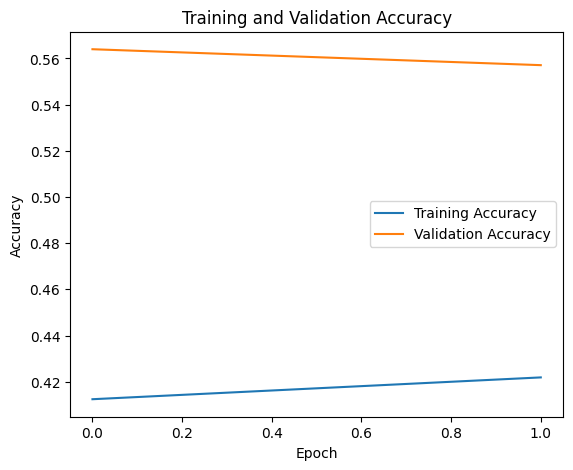

In [10]:
# Training parameters
batch_size = 64
epochs = 2 # Reduced epochs for quicker demonstration, increase for better results
print("\nTraining the model with data augmentation...")
# Use the augmented data for training
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
steps_per_epoch=len(x_train) // batch_size,
epochs=epochs,
validation_data=(x_test, y_test)) # Validation on original test data
# --- d. Estimating the Model’s Performance ---
print("\nEvaluating the model on the test set...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
# Plot training history
plt.figure(figsize=(14, 5))
# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


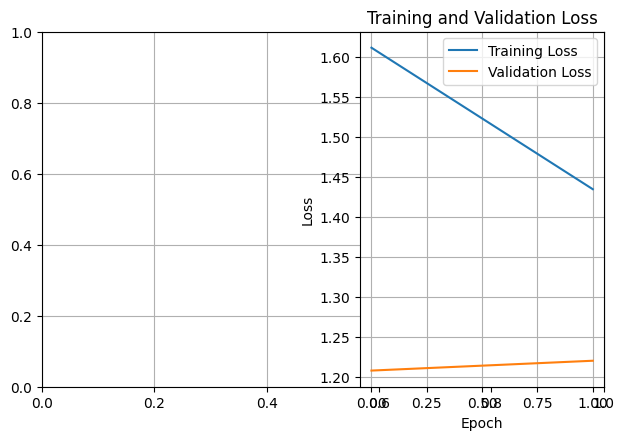


Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
plt.grid(True)
# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Displaying class names for context
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
print("\nClass names:", class_names)